In [3]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

In [ ]:
!pip install pydotplus
!pip install graphviz

In [5]:
col_names = [ 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [7]:
pima = pd.read_csv("diabetes_2.csv", header=0, names=col_names)

In [9]:
pima

,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [11]:
pima.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [13]:
feature_cols = [ 'insulin', 'bmi', 'age','glucose','bp','pedigree']
col_names = [ 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [17]:
X

,insulin,bmi,age,glucose,bp,pedigree
0,0,33.6,50,148,72,0.627
1,0,26.6,31,85,66,0.351
2,0,23.3,32,183,64,0.672
3,94,28.1,21,89,66,0.167
4,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...
763,180,32.9,63,101,76,0.171
764,0,36.8,27,122,70,0.340
765,112,26.2,30,121,72,0.245
766,0,30.1,47,126,60,0.349


In [107]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [109]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [111]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
X["insulin"].apply(pd.to_numeric, errors='coerce')

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

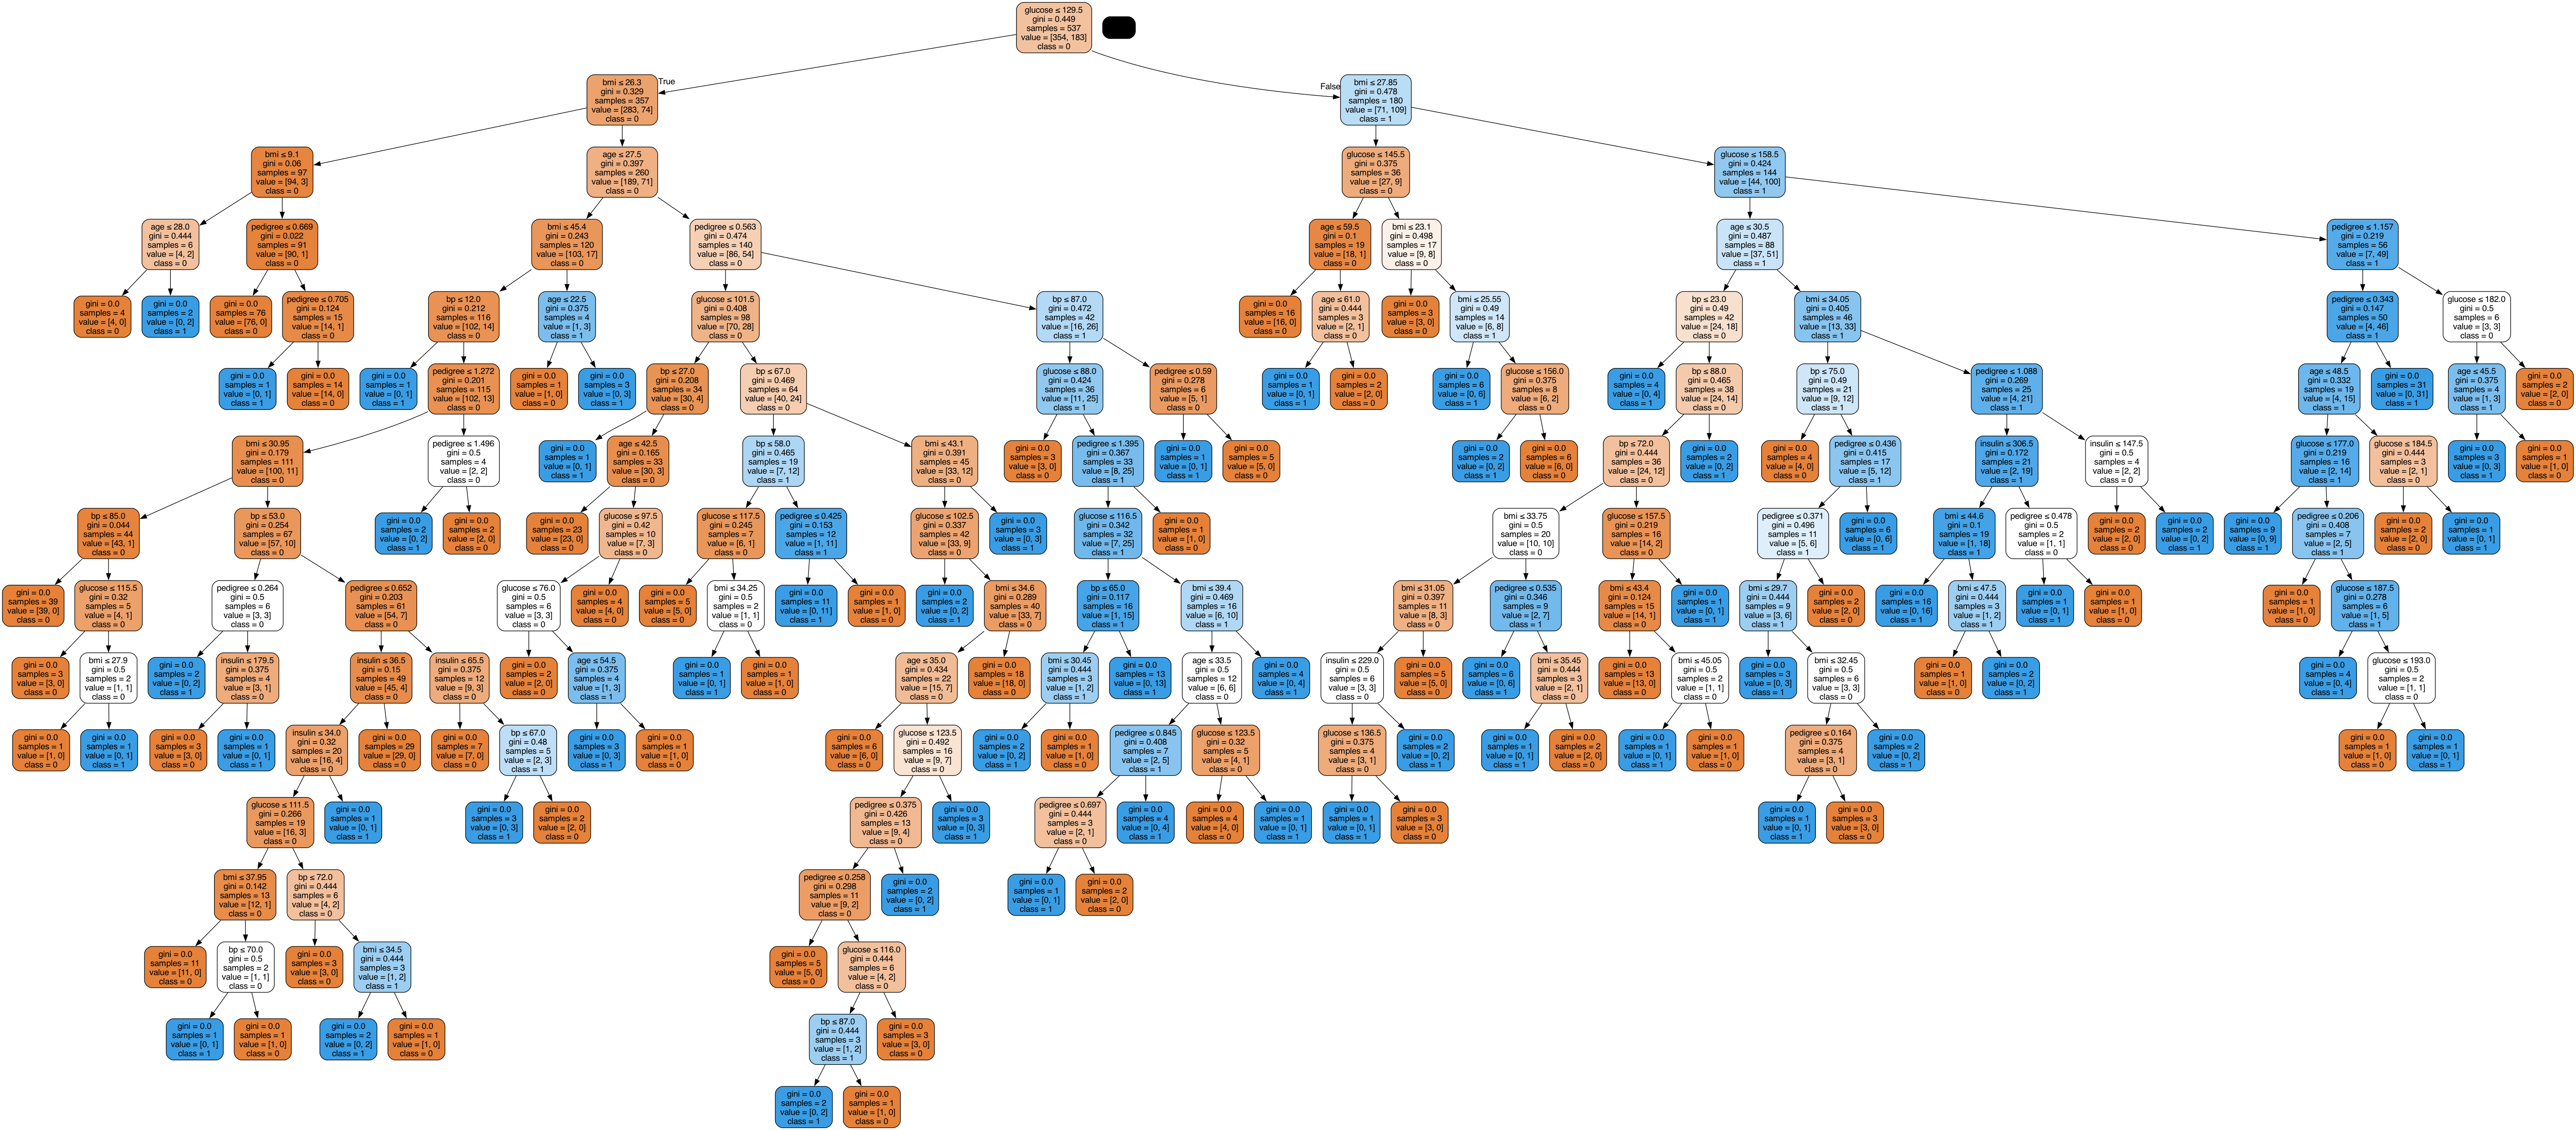

In [113]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
col_names = ["day","morning_temp","label"]

In [ ]:
pima = pd.read_csv("test.csv", header=0, names=col_names)

In [ ]:
pima

In [ ]:
feature_cols = [ "day","morning_temp","label"]
X = pima[feature_cols] # Features
y = pima.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
X_train

In [ ]:
y_pred

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [57]:
y_pred = regressor.predict(X_test)

In [49]:
X_test.iloc[:1,:]

array([0.3])

In [53]:
y_test.iloc[:2,]

285    0
101    0
Name: label, dtype: int64